In [1]:
pip install numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


1: Maximum Likelihood Estimation -
Estimated μ (MLE): μ1 = 1.000125251773414, μ2 = 2.9954025671561597


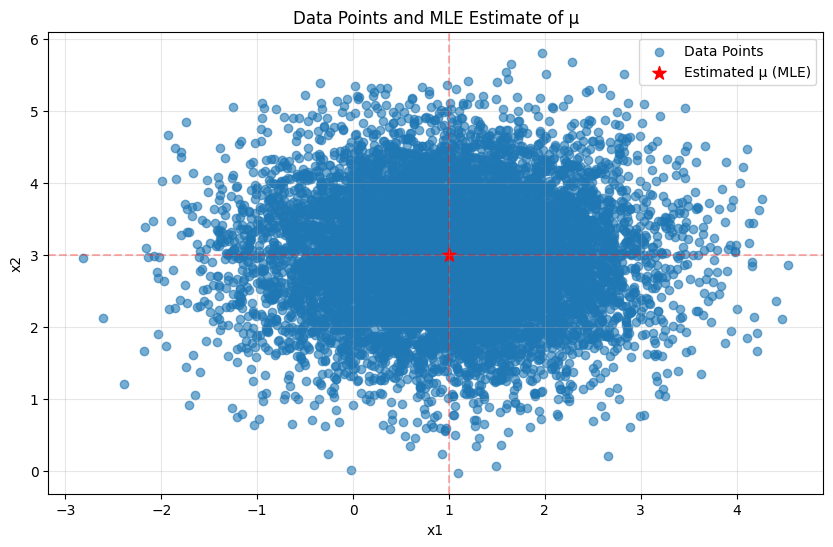


2: Nonlinear Regression -
Estimated regression function values:
x	True	KNN	Random Forest
0.00	0.0000	0.3282	0.3091
0.35	0.6858	0.4285	0.1271
0.70	1.2884	1.2285	1.4341
1.05	1.7348	2.0347	2.2069
1.40	1.9709	2.4954	2.4714
1.75	1.9680	1.8477	1.4154
2.10	1.7264	1.4214	1.8337
2.45	1.2755	1.3490	1.1218
2.80	0.6700	0.7091	0.8529
3.14	0.0032	0.9619	0.7881


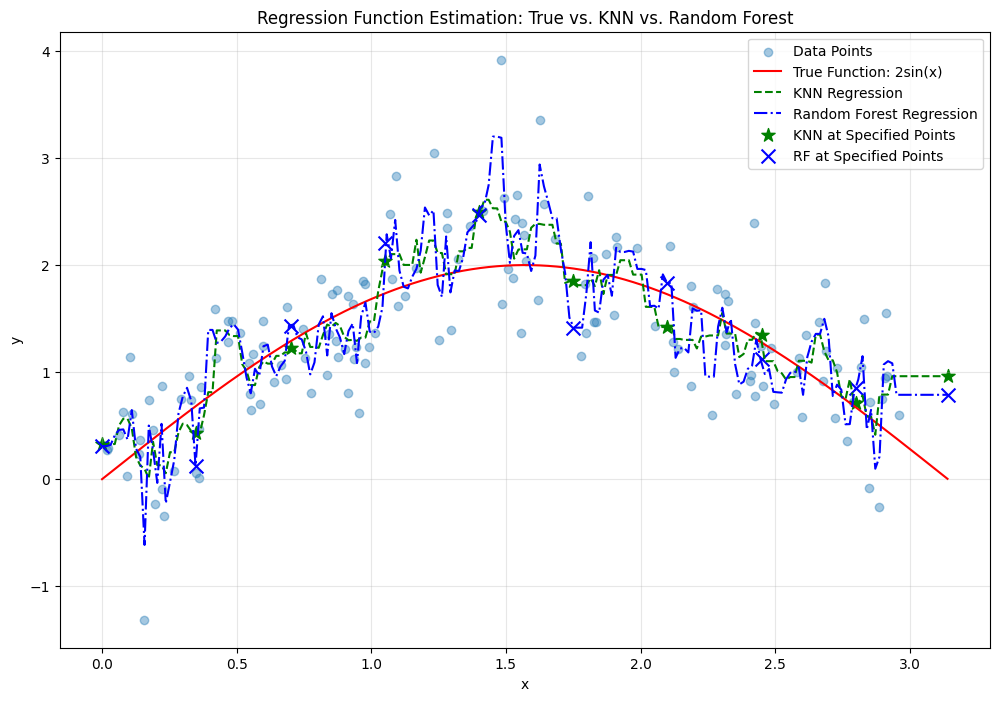

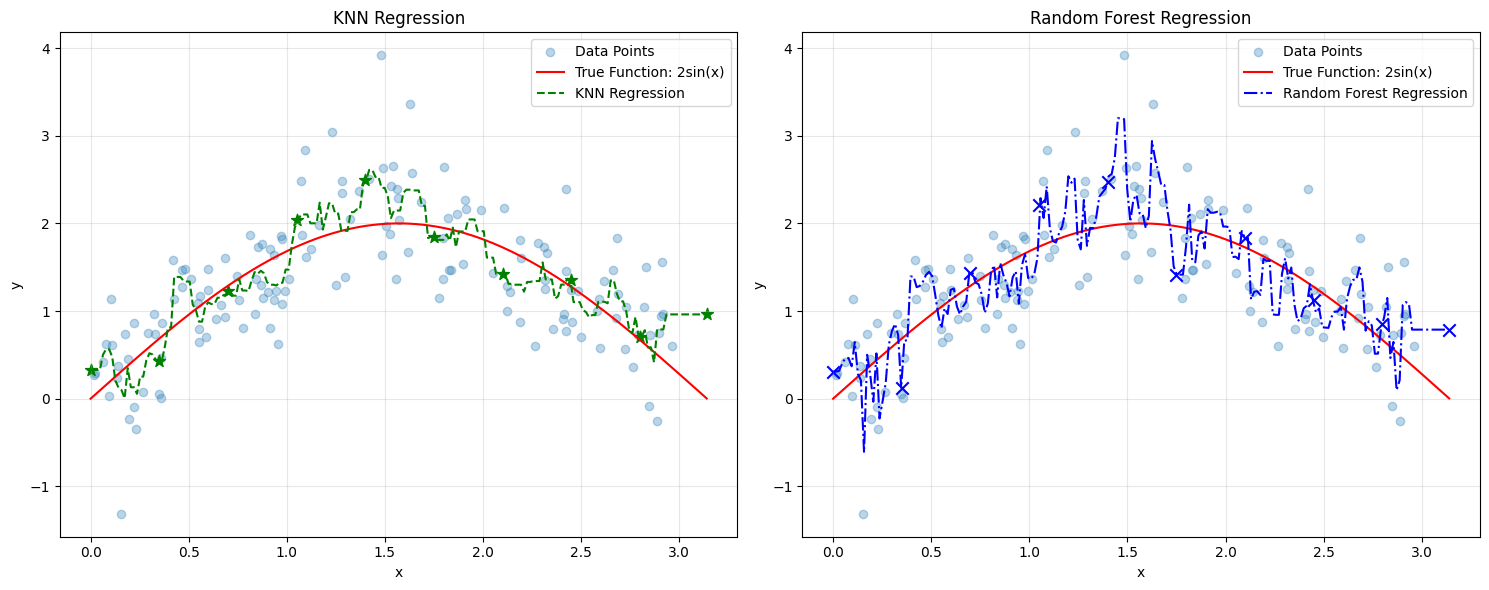

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import math
def part1solution():
    data = pd.read_csv('DataSet_4.csv', header=None)
    data.columns = ['x1', 'x2']
    mu_hat = data.mean().values
    print("1: Maximum Likelihood Estimation -")
    print(f"Estimated μ (MLE): μ1 = {mu_hat[0]}, μ2 = {mu_hat[1]}")
    plt.figure(figsize=(10, 6))
    plt.scatter(data['x1'], data['x2'], alpha=0.6, label='Data Points')
    plt.scatter(mu_hat[0], mu_hat[1], color='red', s=100, marker='*', label='Estimated μ (MLE)')
    plt.axhline(y=mu_hat[1], color='r', linestyle='--', alpha=0.3)
    plt.axvline(x=mu_hat[0], color='r', linestyle='--', alpha=0.3)
    plt.grid(True, alpha=0.3)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Data Points and MLE Estimate of μ')
    plt.legend()
    plt.show()
    return mu_hat
def part2solution():
    np.random.seed(42)
    N = 150
    x_i = np.random.uniform(0, 3, N)
    m0 = lambda x: 2 * np.sin(x)
    epsilon_i = np.random.normal(0, math.sqrt(0.25), N)
    y_i = m0(x_i) + epsilon_i
    df = pd.DataFrame({'x': x_i, 'y': y_i})
    df = df.sort_values(by='x')
    x_points = np.array([0, 0.35, 0.70, 1.05, 1.40, 1.75, 2.10, 2.45, 2.80, 3.14])
    X = df['x'].values.reshape(-1, 1)
    y = df['y'].values
    X_points = x_points.reshape(-1, 1)
    true_values = m0(x_points)
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X, y)
    y_pred_knn = knn.predict(X_points)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    y_pred_rf = rf.predict(X_points)
    x_continuum = np.linspace(0, 3.14, 200).reshape(-1, 1)
    y_true_continuum = m0(x_continuum.flatten())
    y_knn_continuum = knn.predict(x_continuum)
    y_rf_continuum = rf.predict(x_continuum)
    print("\n2: Nonlinear Regression -")
    print("Estimated regression function values:")
    print("x\tTrue\tKNN\tRandom Forest")
    for i in range(len(x_points)):
        print(f"{x_points[i]:.2f}\t{true_values[i]:.4f}\t{y_pred_knn[i]:.4f}\t{y_pred_rf[i]:.4f}")
    plt.figure(figsize=(12, 8))
    plt.scatter(X, y, alpha=0.4, label='Data Points')
    plt.plot(x_continuum, y_true_continuum, 'r-', label='True Function: 2sin(x)')
    plt.plot(x_continuum, y_knn_continuum, 'g--', label='KNN Regression')
    plt.plot(x_continuum, y_rf_continuum, 'b-.', label='Random Forest Regression')
    plt.scatter(x_points, y_pred_knn, color='green', s=100, marker='*', label='KNN at Specified Points')
    plt.scatter(x_points, y_pred_rf, color='blue', s=100, marker='x', label='RF at Specified Points')
    plt.grid(True, alpha=0.3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Regression Function Estimation: True vs. KNN vs. Random Forest')
    plt.legend()
    plt.show()
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    axes[0].scatter(X, y, alpha=0.3, label='Data Points')
    axes[0].plot(x_continuum, y_true_continuum, 'r-', label='True Function: 2sin(x)')
    axes[0].plot(x_continuum, y_knn_continuum, 'g--', label='KNN Regression')
    axes[0].scatter(x_points, y_pred_knn, color='green', s=80, marker='*')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[0].set_title('KNN Regression')
    axes[0].legend()
    axes[1].scatter(X, y, alpha=0.3, label='Data Points')
    axes[1].plot(x_continuum, y_true_continuum, 'r-', label='True Function: 2sin(x)')
    axes[1].plot(x_continuum, y_rf_continuum, 'b-.', label='Random Forest Regression')
    axes[1].scatter(x_points, y_pred_rf, color='blue', s=80, marker='x')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')
    axes[1].set_title('Random Forest Regression')
    axes[1].legend()
    plt.tight_layout()
    plt.show()
    results = {
        'x_points': x_points,
        'true_values': true_values,
        'knn_estimates': y_pred_knn,
        'rf_estimates': y_pred_rf}
    return results
if __name__ == "__main__":
    mu_hat = part1solution()
    regression_results = part2solution()